# 1. 鲜花图像获取

In [ ]:
import requests
import os
import urllib

class GetImage():
    def __init__(self,keyword='鲜花',paginator=1):
        # self.url: 链接头
        self.url = 'http://image.baidu.com/search/acjson?'
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT10.0; WOW64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/69.0.3497.81 Safari/537.36'
            }
        self.keyword = keyword      # 定义关键词
        self.paginator = paginator  # 定义要爬取的页数

    def get_param(self):
        # 将中文关键词转换为符合规则的编码
        keyword = urllib.parse.quote(self.keyword)
        params = []
        # 为爬取的每页链接定制参数
        for i in range(1, self.paginator + 1):
            params.append(
                'tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord={}&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=&hd=1&latest=0&copyright=0&word={}&s=&se=&tab=&width=&height=&face=0&istype=2&qc=&nc=1&fr=&expermode=&force=&cg=star&pn={}&rn=30&gsm=78&1557125391211='.format(keyword, keyword, 30 * i))
        return params   # 返回链接参数
    
    def get_urls(self, params):
        urls = []
        for param in params:
            # 拼接每页的链接
            urls.append(self.url + param)
        return urls   # 返回每页链接

    def get_image_url(self, urls):
        image_url = []
        for url in urls:
            json_data = requests.get(url, headers=self.headers).json()
            json_data = json_data.get('data')
            for i in json_data:
                if i:
                    image_url.append(i.get('thumbURL'))
            
        return image_url

    def get_image(self, image_url):
        """
        根据图片url，在本地目录下新建一个以搜索关键字命名的文件夹，然后将每一个图片存入。
        :param image_url:
        :return:
        """
        file_name = os.path.join('.', self.keyword)
        print(file_name)
        if not os.path.exists(file_name):
            os.mkdir(file_name)
        for index, url in enumerate(image_url, start=1):
            with open(file_name+'/{}.jpg'.format(index), 'wb') as f:
                f.write(requests.get(url,headers=self.headers).content)
            if index != 0 and index % 30 == 0:
                print('第{}页下载完成'.format(index/30))

    def __call__(self, *args, **kwargs):
        params = self.get_param()  # 获取链接参数
        urls = self.get_urls(params)
        image_url = self.get_image_url(urls)
        self.get_image(image_url)

if __name__ == '__main__':
    spider = GetImage('鲜花', 3)
    spider()

 

In [ ]:
import requests
import os
import urllib

def get_param(keyword, paginator):
    # 将中文关键词转换为符合规则的编码
    keyword = urllib.parse.quote(keyword)
    params = []
    # 为爬取的每页链接定制参数
    for i in range(1, paginator + 1):
        params.append(
            'tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord={}&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=&hd=1&latest=0&copyright=0&word={}&s=&se=&tab=&width=&height=&face=0&istype=2&qc=&nc=1&fr=&expermode=&force=&cg=star&pn={}&rn=30&gsm=78&1557125391211='.format(keyword, keyword, 30 * i))
    return params   # 返回链接参数

def get_urls(url, params):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT10.0; WOW64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/69.0.3497.81 Safari/537.36'
        }
    urls = []
    for param in params:
        # 拼接每页的链接
        urls.append(url + param)
    return urls   # 返回每页链接

def get_image_url(urls, headers):
    image_url = []
    for url in urls:
        page_json = requests.get(url, headers=headers).json()
        page_data = page_json.get('data')
        for data in page_data:
            if data:
                image_url.append(data.get('thumbURL'))
            
    return image_url

def get_image(keyword, image_url):
    """
    根据图片url，在本地目录下新建一个以搜索关键字命名的文件夹，然后将每一个图片存入。
    :param image_url:
    :return:
    """
    file_name = os.path.join('.', keyword)
    print(file_name)
    if not os.path.exists(file_name):
        os.mkdir(file_name)
    for index, url in enumerate(image_url, start=1):
        with open(file_name+'/{}.jpg'.format(index), 'wb') as f:
            f.write(requests.get(url,headers=headers).content)
            print(requests.get(url,headers=headers).content)
            break
        if index != 0 and index % 30 == 0:
            print('第{}页下载完成'.format(index/30))

if __name__ == '__main__':
    url = 'http://image.baidu.com/search/acjson?'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT10.0; WOW64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/69.0.3497.81 Safari/537.36'
        }
    keyword = '小狗'      # 定义关键词
    paginator = 3  # 定义要爬取的页数
    params = get_param(keyword,paginator)
    urls = get_urls(url, params)
    image_urls = get_image_url(urls,headers)
    get_image(keyword, image_urls)

    # spider = GetImage('鲜花', 1)
    # spider()


In [ ]:
def getManyPages(keyword,pages):
    params=[]
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT10.0; WOW64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/69.0.3497.81 Safari/537.36'
        }
    for i in range(30,30*pages+30,30):
        params.append({
                      'tn': 'resultjson_com',
                      'ipn': 'rj',
                      'ct': 201326592,
                      'is': '',
                      'fp': 'result',
                      'queryWord': keyword,
                      'cl': 2,
                      'lm': -1,
                      'ie': 'utf-8',
                      'oe': 'utf-8',
                      'adpicid': '',
                      'st': -1,
                      'z': '',
                      'ic': 0,
                      'word': keyword,
                      's': '',
                      'se': '',
                      'tab': '',
                      'width': '',
                      'height': '',
                      'face': 0,
                      'istype': 2,
                      'qc': '',
                      'nc': 1,
                      'fr': '',
                      'pn': i,
                      'rn': 30,
                      'gsm': '1e',
                      '1488942260214': ''
                  })
    # print(params)
    url = 'https://image.baidu.com/search/acjson?'

    urls = []
    for i in params:
        try:
            print(requests.get(url,headers=headers,params=i).json())
            # urls.append(requests.get(url,headers=headers,params=i).json().get('data'))
            # print(urls)
        except json.decoder.JSONDecodeError:
            print("解析出错")
        
    # return urls
getManyPages("ggg", 2)

# 2.鲜花图像预处理

In [3]:
import numpy as np
from PIL import Image
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import os
# from os import listdir
import cv2
from sklearn import preprocessing
%matplotlib inline

In [ ]:
# 处理1：将图片裁剪为固定大小（width*height）
def resize_image(width, height,infile,outfile):
    """按照固定尺寸处理图片"""
    im = Image.open(infile)
    display(im)
    # print( np.array(im))
    print(im.size)
    out = im.resize((width, height), Image.ANTIALIAS)
    display(out)
    print(out.size)
    out.save(outfile)
    return out

In [ ]:
infile = '鲜花/3.jpg'
outfile = '鲜花/3_contrast.jpg'
resize_image = resize_image(100, 100,infile,outfile)

In [ ]:
# 处理2：将图片转化为灰度图
def rgb2gray(infile,outfile):
    im = Image.open(infile)
    display(im)
    out = im.convert('L')
    # display(out)
    out.save(outfile)
    return out

In [ ]:
infile = '鲜花/3.jpg'
outfile = '鲜花/3_contrast.jpg'
rgb2gray(infile, outfile)

In [ ]:
# 处理3：将图片的值标准化：(X-X_mean)/X_std 计算时对每个属性/每列分别进行
def standardization_image(infile, outfile):
    im = rgb2gray(infile,outfile.replace('15','15_'))
    display(im)
    # print(np.array(im))
    out = preprocessing.scale(np.array(im),axis=-1)
    out = Image.fromarray(out)
    # print(np.array(out))
    # out.convert('L').save(outfile, format='jpeg')
    out.convert('L').save(outfile, format='JPG')
    # out.save(outfile)
    return out

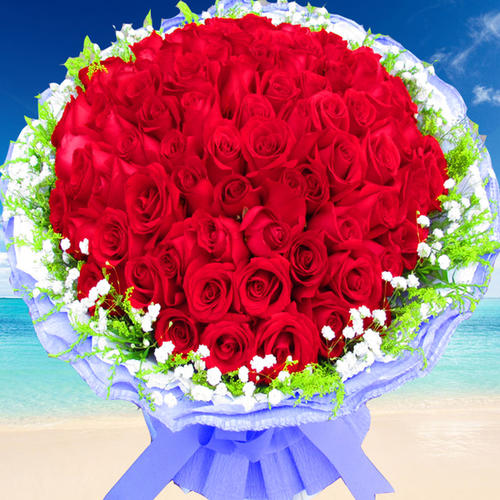

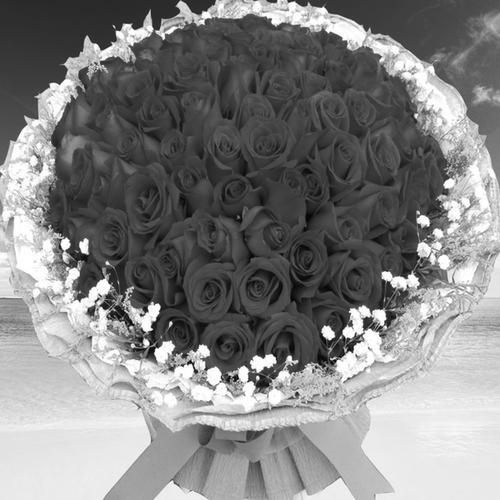

KeyError: 'JPG'

In [ ]:
infile = '鲜花/3.jpg'
outfile = '鲜花/3_contrast.jpg'
standardization_image(infile, outfile)


In [8]:
import cv2
# 处理4：图像增强，gamma变换  采用了非线性函数（指数函数）对图像的灰度值进行变换。
# 当gamma>1时，会减小灰度级较高的地方，增大灰度级较低的地方；当gamma<1时，会增大灰度级较高的地方，减小灰度级较低的地方；
# 伽马变换对像素值做的是幂次方变换，主要是图像的灰度级发生改变
def gama_transfer(infile,outfile,power1=1):
    im =cv2.imread(infile)
    if len(im.shape) == 3:
         im= cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = 255*np.power(im/255,power1)
    im = np.around(im)
    im[im>255] = 255
    out = im.astype(np.uint8)
    cv2.imwrite(outfile,out)
    return im

In [1]:
infile = '鲜花/3.jpg'
outfile = '鲜花/3_gammaimage.jpg'
gama_transfer(infile, outfile, 2)

NameError: name 'gama_transfer' is not defined

In [4]:
# 处理5：变换图片的对比度与亮度， 采用了线性函数对图像的灰度值进行变换。
def Contrast_and_Brightness(infile,outfile,alpha,beta):
    """使用公式f(x)=α.g(x)+β"""
    # α调节对比度，β调节亮度
    im = cv2.imread(infile)
    print('1')
    # cv2.imshow("gammaimage", im)
    blank = np.zeros(im.shape,im.dtype)    # 创建图片类型的零矩阵
    print('2')
    dst = cv2.addWeighted(im,alpha,blank,1-alpha,beta)#图像混合加权
    print('3')
    # cv2.imshow("gammaimage", dst)
    print('4')
    # cv2.waitKey()
    cv2.imwrite(outfile, dst)
    return dst

In [5]:
infile = '鲜花/3.jpg'
outfile = '鲜花/3_C&B.jpg'
Contrast_and_Brightness(infile, outfile, 2, 30)

1
2
3
4


array([[[255, 126,  32],
        [255, 126,  32],
        [255, 126,  32],
        ...,
        [255, 224,  44],
        [255, 228,  48],
        [255, 230,  50]],

       [[255, 126,  32],
        [255, 126,  32],
        [255, 126,  32],
        ...,
        [255, 228,  48],
        [255, 230,  50],
        [255, 232,  52]],

       [[255, 126,  32],
        [255, 126,  32],
        [255, 126,  32],
        ...,
        [255, 230,  56],
        [255, 232,  58],
        [255, 232,  58]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [12]:
# 处理6：将图片转化为向量
def img2vector(filename):
    # 打开图片，将RGB格式图转化为灰度图
    img = Image.open(filename).convert('L')
    # 图像转换为数组
    arr = np.asarray(img, dtype="uint8")
    # 转换为向量
    returnVect = arr.reshape((1,500*500))
    # 返回转换后的1x10000向量
    print(returnVect)
    return returnVect


In [13]:
infile = '鲜花/3.jpg'
img2vector(infile)

[[ 43  43  43 ... 234 234 234]]


array([[ 43,  43,  43, ..., 234, 234, 234]], dtype=uint8)